In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sympy import *
import time
from sympy.parsing.sympy_parser import parse_expr
from kda import graph_utils, calculations, ode, svd
from kda.plotting import *

In [2]:
k12 = 1
k21 = 1
k23 = 1
k32 = 1
k13 = 1
k31 = 1
k43 = 1
k34 = 1

#=========== Standard ==============
k3 = np.array([[0, k12, k13],
              [k21, 0, k23],
              [k31, k32, 0]])

rate_names3 = ["k12", "k21", "k23", "k32", "k13", "k31"]

#=========== Dangling ==============
k3d = np.array([[  0, k12, k13,   0],
                [k21,   0, k23,   0],
                [k31, k32,   0, k34],
                [0  ,   0, k43,   0]])

rate_names3d = ["k12", "k21", "k23", "k32", "k13", "k31", "k43", "k34"]

In [3]:
G3 = nx.MultiDiGraph()
graph_utils.generate_edges(G3, k3)

pos3 = {0 : [0, 1],
        1 : [-np.sqrt(3)/2, -0.5],
        2 : [np.sqrt(3)/2, -0.5]}

G3d = nx.MultiDiGraph()
graph_utils.generate_edges(G3d, k3d)

pos3d = {0 : [0, 0.5],
         1 : [-np.sqrt(3)/2, -0.5],
         2 : [np.sqrt(3)/2, -0.5],
         3 : [(np.sqrt(3)/2) + 1, -0.5]}

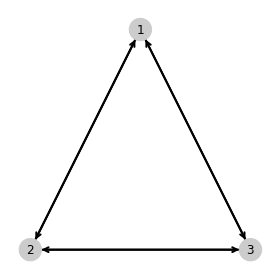

In [4]:
draw_diagrams(G3, pos=pos3)

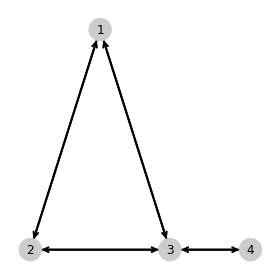

In [5]:
draw_diagrams(G3d, pos=pos3d)

## State Probabilities

In [6]:
probs_3 = calculations.calc_state_probs(G3, key='name', output_strings=True)

In [7]:
probs_3d = calculations.calc_state_probs(G3d, key='name', output_strings=True)

In [8]:
k43, k34, k_leak = symbols("k43, k34, k_leak")
sub_dict = {k43 : k_leak,
            k34 : k_leak}

In [9]:
for p in probs_3d:
    print("")
    print(latex(p))


\frac{k_{21} k_{31} k_{43} + k_{21} k_{32} k_{43} + k_{23} k_{31} k_{43}}{k_{12} k_{23} k_{34} + k_{12} k_{23} k_{43} + k_{12} k_{31} k_{43} + k_{12} k_{32} k_{43} + k_{13} k_{21} k_{34} + k_{13} k_{21} k_{43} + k_{13} k_{23} k_{34} + k_{13} k_{23} k_{43} + k_{13} k_{32} k_{43} + k_{21} k_{31} k_{43} + k_{21} k_{32} k_{43} + k_{23} k_{31} k_{43}}

\frac{k_{12} k_{31} k_{43} + k_{12} k_{32} k_{43} + k_{13} k_{32} k_{43}}{k_{12} k_{23} k_{34} + k_{12} k_{23} k_{43} + k_{12} k_{31} k_{43} + k_{12} k_{32} k_{43} + k_{13} k_{21} k_{34} + k_{13} k_{21} k_{43} + k_{13} k_{23} k_{34} + k_{13} k_{23} k_{43} + k_{13} k_{32} k_{43} + k_{21} k_{31} k_{43} + k_{21} k_{32} k_{43} + k_{23} k_{31} k_{43}}

\frac{k_{12} k_{23} k_{43} + k_{13} k_{21} k_{43} + k_{13} k_{23} k_{43}}{k_{12} k_{23} k_{34} + k_{12} k_{23} k_{43} + k_{12} k_{31} k_{43} + k_{12} k_{32} k_{43} + k_{13} k_{21} k_{34} + k_{13} k_{21} k_{43} + k_{13} k_{23} k_{34} + k_{13} k_{23} k_{43} + k_{13} k_{32} k_{43} + k_{21} k_{31} k_{4

In [10]:
simplify(probs_3d[0].subs(sub_dict))

(k21*k31 + k21*k32 + k23*k31)/(2*k12*k23 + k12*k31 + k12*k32 + 2*k13*k21 + 2*k13*k23 + k13*k32 + k21*k31 + k21*k32 + k23*k31)

In [11]:
simplify(probs_3[0] / simplify(probs_3d[0].subs(sub_dict)))

(2*k12*k23 + k12*k31 + k12*k32 + 2*k13*k21 + 2*k13*k23 + k13*k32 + k21*k31 + k21*k32 + k23*k31)/(k12*k23 + k12*k31 + k12*k32 + k13*k21 + k13*k23 + k13*k32 + k21*k31 + k21*k32 + k23*k31)

## Net Cycle Fluxes

In [12]:
cycle = [0, 1, 2]
order = [0, 1] # CCW is positive

In [13]:
J_3_state = calculations.calc_net_cycle_flux(G3, cycle, order, key='name', output_strings=True)
J_3_state_dangling = calculations.calc_net_cycle_flux(G3d, cycle, order, key='name', output_strings=True)

k_leak = 10
k43, k34, k_leak = symbols("k43, k34, k_leak")
sub_dict = {k43 : k_leak,
            k34 : k_leak}
J_3_state_dangling_simplified = simplify(J_3_state_dangling.subs(sub_dict))

Cycle [0, 1, 2] contains all nodes in G. No flux diagrams generated.
No flux diagrams detected for cycle [0, 1, 2]. Sigma K value is 1.


In [14]:
latex(J_3_state)

'\\frac{k_{12} k_{23} k_{31} - k_{13} k_{21} k_{32}}{k_{12} k_{23} + k_{12} k_{31} + k_{12} k_{32} + k_{13} k_{21} + k_{13} k_{23} + k_{13} k_{32} + k_{21} k_{31} + k_{21} k_{32} + k_{23} k_{31}}'

In [15]:
latex(J_3_state_dangling)

'\\frac{k_{43} \\left(k_{12} k_{23} k_{31} - k_{13} k_{21} k_{32}\\right)}{k_{12} k_{23} k_{34} + k_{12} k_{23} k_{43} + k_{12} k_{31} k_{43} + k_{12} k_{32} k_{43} + k_{13} k_{21} k_{34} + k_{13} k_{21} k_{43} + k_{13} k_{23} k_{34} + k_{13} k_{23} k_{43} + k_{13} k_{32} k_{43} + k_{21} k_{31} k_{43} + k_{21} k_{32} k_{43} + k_{23} k_{31} k_{43}}'

##  Limits

In [16]:
J_3_state

(k12*k23*k31 - k13*k21*k32)/(k12*k23 + k12*k31 + k12*k32 + k13*k21 + k13*k23 + k13*k32 + k21*k31 + k21*k32 + k23*k31)

#### Limit as k43 approaches zero

In [17]:
limit(J_3_state_dangling, k43, 0)

0

#### Limit as k43 approaches infinity

In [18]:
simplify(limit_seq(J_3_state_dangling, k43))

(k12*k23*k31 - k13*k21*k32)/(k12*k23 + k12*k31 + k12*k32 + k13*k21 + k13*k23 + k13*k32 + k21*k31 + k21*k32 + k23*k31)

#### Limit as k34 approaches zero

In [19]:
limit(J_3_state_dangling, k34, 0)

(k12*k23*k31 - k13*k21*k32)/(k12*k23 + k12*k31 + k12*k32 + k13*k21 + k13*k23 + k13*k32 + k21*k31 + k21*k32 + k23*k31)

#### Limit as k34 approaches infinity

In [20]:
limit_seq(J_3_state_dangling, k34)

0

### Assert string equations are the same

In [21]:
assert str(simplify(limit_seq(J_3_state_dangling, k43))) == str(J_3_state)
assert str(limit(J_3_state_dangling, k34, 0)) == str(J_3_state)

##  ====================== Plots ======================

In [22]:
lambda_func3 = lambdify(rate_names3, J_3_state)
lambda_func3d = lambdify(rate_names3d, J_3_state_dangling)

In [23]:
pstep = 0.1
power = 7
power_arr = np.arange(-power, power+pstep, pstep)
leak_rate = 10 ** power_arr

kon = 1e10
koff = 1e3
k_conf = 100
# cin = 10 ** -6.5
# cout = 10 ** -7.5
cin = 10 ** -7
cout = 10 ** -7

k12 = kon*cin
k21 = koff
k23 = koff
k32 = kon*cout
k31 = k_conf
k13 = k_conf

#### Plug in zero for k34, k43

In [24]:
lambda_func3d(k12, k21, k23, k32, k13, k31, k43=0, k34=1)

0.0

In [25]:
lambda_func3d(k12, k21, k23, k32, k13, k31, k43=1, k34=0)

0.0

In [26]:
expected = lambda_func3(k12, k21, k23, k32, k13, k31)
actual_k34 = lambda_func3d(k12, k21, k23, k32, k13, k31, k43=1, k34=leak_rate)/expected
actual_k43 = lambda_func3d(k12, k21, k23, k32, k13, k31, k43=leak_rate, k34=1)/expected
actual_both = lambda_func3d(k12, k21, k23, k32, k13, k31, k43=leak_rate, k34=leak_rate)/expected

C:\Users\nikol\AppData\Local\Temp\ipykernel_14584\2557600407.py:2: RuntimeWarning: invalid value encountered in true_divide
  actual_k34 = lambda_func3d(k12, k21, k23, k32, k13, k31, k43=1, k34=leak_rate)/expected
C:\Users\nikol\AppData\Local\Temp\ipykernel_14584\2557600407.py:3: RuntimeWarning: invalid value encountered in true_divide
  actual_k43 = lambda_func3d(k12, k21, k23, k32, k13, k31, k43=leak_rate, k34=1)/expected
C:\Users\nikol\AppData\Local\Temp\ipykernel_14584\2557600407.py:4: RuntimeWarning: invalid value encountered in true_divide
  actual_both = lambda_func3d(k12, k21, k23, k32, k13, k31, k43=leak_rate, k34=leak_rate)/expected


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


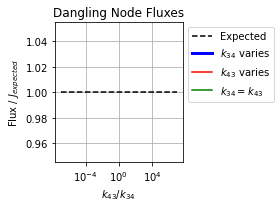

In [27]:
fig = plt.figure(figsize=(4, 3), tight_layout=True)
ax = fig.add_subplot(111)
ax.semilogx(leak_rate, np.ones(len(leak_rate)), color="black", ls="--", label="Expected")
ax.semilogx(1/leak_rate, actual_k34, color="blue", lw=3, label=r"$k_{34}$ varies")
ax.semilogx(leak_rate/1, actual_k43, color="red", label=r"$k_{43}$ varies")
ax.semilogx(leak_rate, actual_both, color="green", label=r"$k_{34} = k_{43}$")
# ax.set_ylim(-10, 60)
ax.set_title("Dangling Node Fluxes")
ax.set_xlabel(r"$k_{43} / k_{34}$")
ax.set_ylabel(r"Flux / $J_{expected}$")
ax.legend(bbox_to_anchor=(1, 1))
ax.grid(True)
plt.savefig("dangling_node_1.png", dpi=300)

In [28]:
p1f = lambdify(rate_names3, probs_3[0])
p2f = lambdify(rate_names3, probs_3[1])
p3f = lambdify(rate_names3, probs_3[2])

p1f_3d = lambdify(rate_names3d, probs_3d[0])
p2f_3d = lambdify(rate_names3d, probs_3d[1])
p3f_3d = lambdify(rate_names3d, probs_3d[2])
p4f_3d = lambdify(rate_names3d, probs_3d[3])

In [29]:
p1 = p1f(k12, k21, k23, k32, k13, k31)
p2 = p2f(k12, k21, k23, k32, k13, k31)
p3 = p3f(k12, k21, k23, k32, k13, k31)

p1d = p1f_3d(k12, k21, k23, k32, k13, k31, k43=leak_rate, k34=1)
p2d = p2f_3d(k12, k21, k23, k32, k13, k31, k43=leak_rate, k34=1)
p3d = p3f_3d(k12, k21, k23, k32, k13, k31, k43=leak_rate, k34=1)
p4d = p4f_3d(k12, k21, k23, k32, k13, k31, k43=leak_rate, k34=1)

p1d2 = p1f_3d(k12, k21, k23, k32, k13, k31, k43=leak_rate, k34=leak_rate)
p2d2 = p2f_3d(k12, k21, k23, k32, k13, k31, k43=leak_rate, k34=leak_rate)
p3d2 = p3f_3d(k12, k21, k23, k32, k13, k31, k43=leak_rate, k34=leak_rate)
p4d2 = p4f_3d(k12, k21, k23, k32, k13, k31, k43=leak_rate, k34=leak_rate)

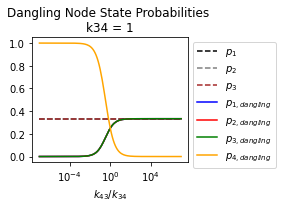

In [30]:
fig = plt.figure(figsize=(4, 3), tight_layout=True)
ax = fig.add_subplot(111)

ax.semilogx(leak_rate, p1*np.ones(len(leak_rate)), color="black", ls="--", label=r"$p_{1}$")
ax.semilogx(leak_rate, p2*np.ones(len(leak_rate)), color="grey", ls="--", label=r"$p_{2}$")
ax.semilogx(leak_rate, p3*np.ones(len(leak_rate)), color="brown", ls="--", label=r"$p_{3}$")
ax.semilogx(leak_rate, p1d, color="blue", label=r"$p_{1, dangling}$")
ax.semilogx(leak_rate, p2d, color="red", label=r"$p_{2, dangling}$")
ax.semilogx(leak_rate, p3d, color="green", label=r"$p_{3, dangling}$")
ax.semilogx(leak_rate, p4d, color="orange", label=r"$p_{4, dangling}$")

# ax.set_ylim(0, 1)
ax.set_title("Dangling Node State Probabilities \n"
             "k34 = 1")
ax.set_xlabel(r"$k_{43} / k_{34}$")
# ax.set_ylabel(r"Flux / $J_{expected}$")
ax.legend(bbox_to_anchor=(1, 1))
plt.savefig("dangling_node_2.png", dpi=300)

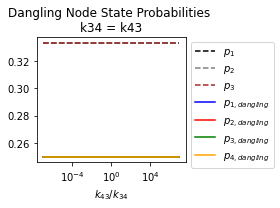

In [31]:
fig = plt.figure(figsize=(4, 3), tight_layout=True)
ax = fig.add_subplot(111)

ax.semilogx(leak_rate, p1*np.ones(len(leak_rate)), color="black", ls="--", label=r"$p_{1}$")
ax.semilogx(leak_rate, p2*np.ones(len(leak_rate)), color="grey", ls="--", label=r"$p_{2}$")
ax.semilogx(leak_rate, p3*np.ones(len(leak_rate)), color="brown", ls="--", label=r"$p_{3}$")
ax.semilogx(leak_rate, p1d2, color="blue", label=r"$p_{1, dangling}$")
ax.semilogx(leak_rate, p2d2, color="red", label=r"$p_{2, dangling}$")
ax.semilogx(leak_rate, p3d2, color="green", label=r"$p_{3, dangling}$")
ax.semilogx(leak_rate, p4d2, color="orange", label=r"$p_{4, dangling}$")
# ax.set_ylim(0, 1)
ax.set_title("Dangling Node State Probabilities \n"
             "k34 = k43")
ax.set_xlabel(r"$k_{43} / k_{34}$")
# ax.set_ylabel(r"Flux / $J_{expected}$")
ax.legend(bbox_to_anchor=(1, 1))
plt.savefig("dangling_node_22.png", dpi=300)

## KDA vs. ODE Solver

In [32]:
def generate_plot_data(k43, k34, tmax, kda_funcs=[p1f, p2f, p3f], kda_dangling_funcs=[p1f_3d, p2f_3d, p3f_3d, p4f_3d]):
    kon = 1e10
    koff = 1e3
    k_conf = 100
#     cin = 10 ** -6.5
#     cout = 10 ** -7.5
    cin = 10 ** -7
    cout = 10 ** -7

    k12 = kon*cin
    k21 = koff
    k23 = koff
    k32 = kon*cout
    k31 = k_conf
    k13 = k_conf
    
    k3 = np.array([[0, k12, k13],
                  [k21, 0, k23],
                  [k31, k32, 0]])
    k3d = np.array([[  0, k12, k13,   0],
                    [k21,   0, k23,   0],
                    [k31, k32,   0, k34],
                    [0  ,   0, k43,   0]])

    P3 = np.array([1, 10, 100])/111
#     P3d = np.array([1, 1, 1, 1])/4
    P3d = np.array([0, 0, 0, 1])

    results3 = ode.ode_solver(P3, k3, t_max=tmax, tol=1e-12, atol=1e-16, rtol=1e-13)
    results3d = ode.ode_solver(P3d, k3d, t_max=tmax, tol=1e-12, atol=1e-16, rtol=1e-13)
    t3 = results3.t
    t3d = results3d.t
    ode_3 = results3.y
    ode_3d = results3d.y

    p1 = kda_funcs[0](k12, k21, k23, k32, k13, k31)
    p2 = kda_funcs[1](k12, k21, k23, k32, k13, k31)
    p3 = kda_funcs[2](k12, k21, k23, k32, k13, k31)
    
    p1d = kda_dangling_funcs[0](k12, k21, k23, k32, k13, k31, k43=k43, k34=k34)
    p2d = kda_dangling_funcs[1](k12, k21, k23, k32, k13, k31, k43=k43, k34=k34)
    p3d = kda_dangling_funcs[2](k12, k21, k23, k32, k13, k31, k43=k43, k34=k34)
    p4d = kda_dangling_funcs[3](k12, k21, k23, k32, k13, k31, k43=k43, k34=k34)
    
    return t3, t3d, ode_3, ode_3d, p1, p2, p3, p1d, p2d, p3d, p4d

In [33]:
def plot_kda_vs_ODE(k43, k34, t3, p1, p2, p3, ode_3, savestr=None):
    fig = plt.figure(figsize=(4, 3), tight_layout=True)
    ax = fig.add_subplot(111)

    ax.plot(t3, p1*np.ones(len(t3)), color="brown", lw=2, ls="--", label=r"$p_{1, kda}$")
    ax.plot(t3, p2*np.ones(len(t3)), color="grey", lw=2, ls="--", label=r"$p_{2, kda}$")
    ax.plot(t3, p3*np.ones(len(t3)), color="tan", lw=2, ls="--", label=r"$p_{3, kda}$")

    ax.plot(t3, ode_3[0], color="brown", label=r"$p_{1, ode}$")
    ax.plot(t3, ode_3[1], color="grey", label=r"$p_{2, ode}$")
    ax.plot(t3, ode_3[2], color="tan", label=r"$p_{3, ode}$")

    ax.set_ylim(0, 1)
    ax.set_title("3 State Probabilities KDA vs. ODE \n"
                 "k43/k34 = {:.0e}".format(k43/k34))
    ax.set_xlabel(r"Time (s)")
    ax.set_ylabel("Probability")
    ax.legend(bbox_to_anchor=(1, 1))
    if savestr != None:
        plt.savefig(savestr, dpi=300)

In [34]:
def prob_label(idx):
    labelexp = "p_{%s, kda}" % (idx)
    labelact = "p_{%s, ode}" % (idx)
    return r"|$%s$ - $%s$|/$%s$" % (labelexp, labelact, labelexp)

In [35]:
def plot_KDA_vs_ODE_error(k43, k34, t3d, p1, p2, p3, ode_3d, savestr=None):
    fig = plt.figure(figsize=(5, 3), tight_layout=True)
    ax = fig.add_subplot(111)

    arr1 = p1*np.ones(len(t3d))
    arr2 = p2*np.ones(len(t3d))
    arr3 = p3*np.ones(len(t3d))

    ax.semilogx(t3d, np.abs(arr1 - ode_3d[0])/arr1, color="brown", ls="-", label=prob_label(1))
    ax.semilogx(t3d, np.abs(arr2 - ode_3d[1])/arr2, color="grey", ls="-", label=prob_label(2))
    ax.semilogx(t3d, np.abs(arr3 - ode_3d[2])/arr3, color="tan", ls="-", label=prob_label(3))
    ax.semilogx(t3d, ode_3d[3], color="red", ls="-", label=r"$p_{4, ode}$")
#     ax.axhline(1, 0, color="black", ls="--")

    ax.set_title("State Probability Error KDA vs. ODE \n"
                 "k43/k34 = {:.0e}".format(k43/k34))
    ax.set_xlabel(r"Time (s)")
    ax.set_ylabel("Error")
#     ax.set_ylim(-0.1, 1.1)
    ax.grid(True)
    ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
    if savestr != None:
        plt.savefig(savestr, bbox_inches="tight", dpi=300)

#### 1.) test case where k43 == k34

In [36]:
k43 = 1
k34 = 1
tmax = 10

In [37]:
t3, t3d, ode_3, ode_3d, p1, p2, p3, p1d, p2d, p3d, p4d = generate_plot_data(k43=k43, k34=k34, tmax=tmax)


 kda.ode.ode_solver() reached convergence at t=0.029652312353771016


 kda.ode.ode_solver() reached convergence at t=0.028572805856112764


 kda.ode.ode_solver() reached convergence at t=0.029652312353771016



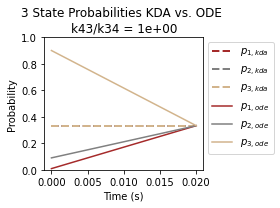

In [38]:
plot_kda_vs_ODE(k43, k34, t3, p1, p2, p3, ode_3, savestr="3_state_probs_k43_=_k34.png")

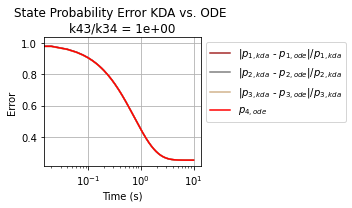

In [39]:
plot_KDA_vs_ODE_error(k43, k34, t3d, p1, p2, p3, ode_3d, savestr="3_state_error_k43_error_k34.png")

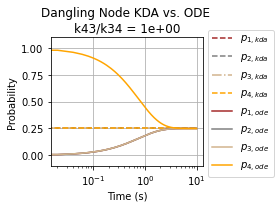

In [40]:
fig = plt.figure(figsize=(4, 3), tight_layout=True)
ax = fig.add_subplot(111)

arr1 = p1d*np.ones(len(t3d))
arr2 = p2d*np.ones(len(t3d))
arr3 = p3d*np.ones(len(t3d))
arr4 = p4d*np.ones(len(t3d))

ax.semilogx(t3d, arr1, color="brown", ls="--", label=r"$p_{1, kda}$")
ax.semilogx(t3d, arr2, color="grey", ls="--", label=r"$p_{2, kda}$")
ax.semilogx(t3d, arr3, color="tan", ls="-.", label=r"$p_{3, kda}$")
ax.semilogx(t3d, arr4, color="orange", ls="--", label=r"$p_{4, kda}$")

ax.semilogx(t3d, ode_3d[0], color="brown", ls="-", label=r"$p_{1, ode}$")
ax.semilogx(t3d, ode_3d[1], color="grey", ls="-", label=r"$p_{2, ode}$")
ax.semilogx(t3d, ode_3d[2], color="tan", ls="-", label=r"$p_{3, ode}$")
ax.semilogx(t3d, ode_3d[3], color="orange", ls="-", label=r"$p_{4, ode}$")

ax.set_title("Dangling Node KDA vs. ODE \n"
             "k43/k34 = {:.0e}".format(k43/k34))
ax.set_xlabel(r"Time (s)")
ax.set_ylabel("Probability")
ax.set_ylim(-0.1, 1.1)
ax.grid(True)
ax.legend(loc="best")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1.1))
plt.savefig("dangling_node_kda_vs_ode.png", dpi=300, )

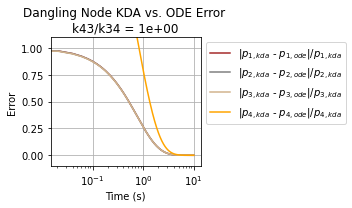

In [41]:
fig = plt.figure(figsize=(5, 3), tight_layout=True)
ax = fig.add_subplot(111)

arr1 = p1d*np.ones(len(t3d))
arr2 = p2d*np.ones(len(t3d))
arr3 = p3d*np.ones(len(t3d))
arr4 = p4d*np.ones(len(t3d))

ax.semilogx(t3d, np.abs(arr1 - ode_3d[0])/arr1, color="brown", ls="-", label=prob_label(1))
ax.semilogx(t3d, np.abs(arr2 - ode_3d[1])/arr2, color="grey", ls="-", label=prob_label(2))
ax.semilogx(t3d, np.abs(arr3 - ode_3d[2])/arr3, color="tan", ls="-", label=prob_label(3))
ax.semilogx(t3d, np.abs(arr4 - ode_3d[3])/arr4, color="orange", ls="-", label=prob_label(4))

ax.set_title("Dangling Node KDA vs. ODE Error \n"
             "k43/k34 = {:.0e}".format(k43/k34))
ax.set_xlabel(r"Time (s)")
ax.set_ylabel("Error")
ax.set_ylim(-0.1, 1.1)
ax.grid(True)
ax.legend(loc="best")
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.savefig("dangling_node_kda_vs_ode_error.png", dpi=300, )

#### 2.) test case where k43 << k34

In [42]:
k43 = 1e-4
k34 = 1e4
tmax = 10

In [43]:
t3, t3d, ode_3, ode_3d, p1, p2, p3, p1d, p2d, p3d, p4d = generate_plot_data(k43=k43, k34=k34, tmax=tmax)


 kda.ode.ode_solver() reached convergence at t=0.029652312353771016


 kda.ode.ode_solver() reached convergence at t=0.028572805856112764


 kda.ode.ode_solver() reached convergence at t=0.029652312353771016


 kda.ode.ode_solver() reached convergence at t=0.03834729358815471


 kda.ode.ode_solver() reached convergence at t=0.03834729358815471



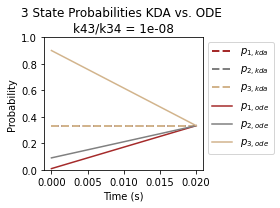

In [44]:
plot_kda_vs_ODE(k43, k34, t3, p1, p2, p3, ode_3, savestr="3_state_probs_k43_less_than_k34.png")

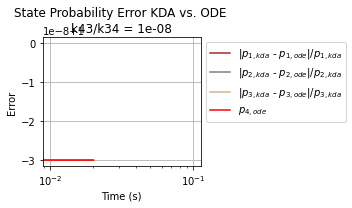

In [45]:
plot_KDA_vs_ODE_error(k43, k34, t3d, p1, p2, p3, ode_3d, savestr="3_state_error_k43_less_than_k34.png")

#### 3.) test case where k43 >> k34

In [46]:
k43 = 1e4
k34 = 1e-4
tmax = 10

In [47]:
t3, t3d, ode_3, ode_3d, p1, p2, p3, p1d, p2d, p3d, p4d = generate_plot_data(k43=k43, k34=k34, tmax=tmax)


 kda.ode.ode_solver() reached convergence at t=0.029652312353771016


 kda.ode.ode_solver() reached convergence at t=0.028572805856112764


 kda.ode.ode_solver() reached convergence at t=0.029652312353771016


 kda.ode.ode_solver() reached convergence at t=0.028920535924308554


 kda.ode.ode_solver() reached convergence at t=0.028920535924308554



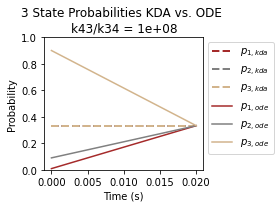

In [48]:
plot_kda_vs_ODE(k43, k34, t3, p1, p2, p3, ode_3, savestr="3_state_probs_k43_greater_than_k34.png")

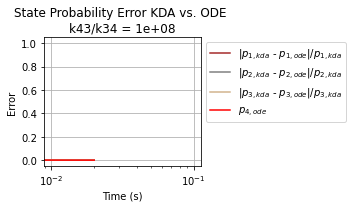

In [49]:
plot_KDA_vs_ODE_error(k43, k34, t3d, p1, p2, p3, ode_3d, savestr="3_state_error_k43_greater_than_k34.png")

## Probability Tables

Need to make 3 separate tables (for clarity), where each one is for a different k43/k34 ratio

In [50]:
import pandas as pd

In [51]:
def generate_table(k43, k34, tmax, dec=5, kda_funcs=[p1f, p2f, p3f], kda_dangling_funcs=[p1f_3d, p2f_3d, p3f_3d, p4f_3d]):
    kon = 1e10
    koff = 1e3
    k_conf = 100
#     cin = 10 ** -6.5
#     cout = 10 ** -7.5
    cin = 10 ** -7
    cout = 10 ** -7

    k12 = kon*cin
    k21 = koff
    k23 = koff
    k32 = kon*cout
    k31 = k_conf
    k13 = k_conf
    
    k3 = np.array([[0, k12, k13],
                  [k21, 0, k23],
                  [k31, k32, 0]])
    k3d = np.array([[  0, k12, k13,   0],
                    [k21,   0, k23,   0],
                    [k31, k32,   0, k34],
                    [0  ,   0, k43,   0]])

    P3 = np.array([1, 1, 1])/3
#     P3d = np.array([1, 1, 1, 1])/4
    P3d = np.array([0, 0, 0, 1])

    ode_3 = np.round(ode.ode_solver(P3, k3, t_max=tmax, tol=1e-12, atol=1e-16, rtol=1e-13).y, decimals=dec)
    ode_3d = np.round(ode.ode_solver(P3d, k3d, t_max=tmax, tol=1e-12, atol=1e-16, rtol=1e-13).y, decimals=dec)

    p1 = np.round(kda_funcs[0](k12, k21, k23, k32, k13, k31), decimals=dec)
    p2 = np.round(kda_funcs[1](k12, k21, k23, k32, k13, k31), decimals=dec)
    p3 = np.round(kda_funcs[2](k12, k21, k23, k32, k13, k31), decimals=dec)
    
    p1d = np.round(kda_dangling_funcs[0](k12, k21, k23, k32, k13, k31, k43=k43, k34=k34), decimals=dec)
    p2d = np.round(kda_dangling_funcs[1](k12, k21, k23, k32, k13, k31, k43=k43, k34=k34), decimals=dec)
    p3d = np.round(kda_dangling_funcs[2](k12, k21, k23, k32, k13, k31, k43=k43, k34=k34), decimals=dec)
    p4d = np.round(kda_dangling_funcs[3](k12, k21, k23, k32, k13, k31, k43=k43, k34=k34), decimals=dec) 

    row_names = [r"$p_{%s}$" % (1), r"$p_{%s}$" % (2), r"$p_{%s}$" % (3), r"$p_{%s}$" % (4)]
    col_names = ["KDA", "ODE", "SVD", "KDA Dangling", "ODE Dangling", "SVD Dangling"]

    KDA_data = [p1, p2, p3, "N/A"]
    KDA_dangling_data = [p1d, p2d, p3d, p4d]
    ODE_data = [ode_3[0][-1], ode_3[1][-1], ode_3[2][-1], "N/A"]
    ODE_dangling_data = [ode_3d[0][-1], ode_3d[1][-1], ode_3d[2][-1], ode_3d[3][-1]]
    SVD_data = list(np.round(svd.svd_solver(k3), decimals=dec)) + ["N/A"]
    SVD_dangling_data = np.round(svd.svd_solver(k3d), decimals=dec)

    data = list(zip(KDA_data, ODE_data, SVD_data, KDA_dangling_data, ODE_dangling_data, SVD_dangling_data))
#     print(data)
    return pd.DataFrame(data, index=row_names, columns=col_names)

In [52]:
def plot_table(tmax, dec=6, savestr=None):
    val1 = 1
    val2 = 1e-4
    val3 = 1e4

    df0 = generate_table(k43=val1, k34=val1, tmax=tmax)
    df1 = generate_table(k43=val2, k34=val3, tmax=tmax)
    df2 = generate_table(k43=val3, k34=val2, tmax=tmax)

    Title_str = ("KDA, ODE, SVD State Probabilities")   
    fig, axs = plt.subplots(3, figsize=(8, 3.5), tight_layout=True)
#     fig.suptitle(Title_str)
    
    axs[0].table(cellText = df0.values,
             rowLabels = df0.index,
             colLabels = df0.columns,
             loc = "center")
    axs[0].legend(loc="upper left", bbox_to_anchor=(1, 0.95), title="k43/k34 = {:.0f}".format(val1))
    
    axs[1].table(cellText = df1.values,
             rowLabels = df1.index,
             colLabels = df1.columns,
             loc = "center")
    axs[1].legend(loc="upper left", bbox_to_anchor=(1, 0.95), title="k43/k34 = {:.0e}".format(val2/val3))
    
    axs[2].table(cellText = df2.values,
             rowLabels = df2.index,
             colLabels = df2.columns,
             loc = "center")
    axs[2].legend(loc="upper left", bbox_to_anchor=(1, 0.95), title="k43/k34 = {:.0e}".format(val3/val2))
    
    axs[0].axis("off")
    axs[1].axis("off")
    axs[2].axis("off")
    fig.canvas.draw()
    if not savestr == None:
        plt.savefig(savestr, bbox_inches="tight", dpi=300)


 kda.ode.ode_solver() reached convergence at t=0.0


 kda.ode.ode_solver() reached convergence at t=3.1622776601683796e-06


 kda.ode.ode_solver() reached convergence at t=0.0


 kda.ode.ode_solver() reached convergence at t=3.1622776601683796e-06



No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.



 kda.ode.ode_solver() reached convergence at t=0.0


 kda.ode.ode_solver() reached convergence at t=3.1622776601683796e-06


 kda.ode.ode_solver() reached convergence at t=0.0


 kda.ode.ode_solver() reached convergence at t=3.1622776601683796e-06


 kda.ode.ode_solver() reached convergence at t=0.03834729358815471


 kda.ode.ode_solver() reached convergence at t=0.03834729358815471


 kda.ode.ode_solver() reached convergence at t=0.0


 kda.ode.ode_solver() reached convergence at t=3.1622776601683796e-06


 kda.ode.ode_solver() reached convergence at t=0.0


 kda.ode.ode_solver() reached convergence at t=3.1622776601683796e-06


 kda.ode.ode_solver() reached convergence at t=0.028920535924308554


 kda.ode.ode_solver() reached convergence at t=0.028920535924308554



findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


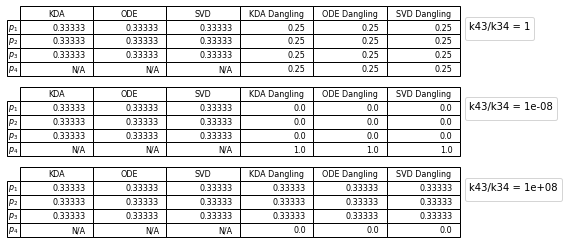

In [53]:
plot_table(tmax=10, savestr="KDA_ODE_SVD_table.png")